Given 2d array, append two columns to each column (except the last one): sum of the column and the next one, differences between the column and the next one
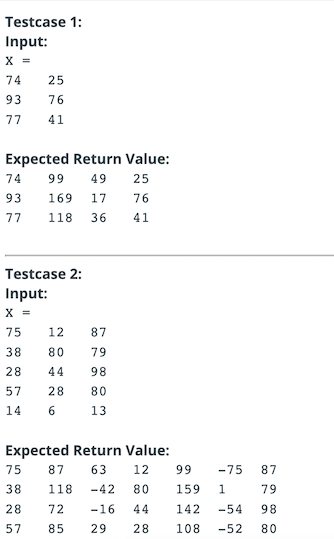

In [1]:
import numpy as np
X1=np.array([[74,25],[93,76],[77,41]])
X1

array([[74, 25],
       [93, 76],
       [77, 41]])

In [2]:
X2=np.array([[75,12,87],[38,80,79],[28,44,98],[57,28,80],[14,6,13]])
X2

array([[75, 12, 87],
       [38, 80, 79],
       [28, 44, 98],
       [57, 28, 80],
       [14,  6, 13]])

In [3]:
a=np.reshape(np.sum(X2[:,0:2],axis=1),(X2.shape[0],1))
a
#np.reshape(np.sum(X2[:,0:2],axis=1),np.sum(X2[:,0:2],axis=1)

array([[ 87],
       [118],
       [ 72],
       [ 85],
       [ 20]])

In [97]:
a.flatten()

array([ 87, 118,  72,  85,  20])

In [92]:
Xt=np.insert(X2,1,[[0],[0]],axis=1)
Xt

array([[75,  0,  0, 12, 87],
       [38,  0,  0, 80, 79],
       [28,  0,  0, 44, 98],
       [57,  0,  0, 28, 80],
       [14,  0,  0,  6, 13]])

In [99]:
Xt[:,1]=a.flatten()
Xt

array([[ 75,  87,   0,  12,  87],
       [ 38, 118,   0,  80,  79],
       [ 28,  72,   0,  44,  98],
       [ 57,  85,   0,  28,  80],
       [ 14,  20,   0,   6,  13]])

In [28]:
(-np.diff(X2[:,0:2],axis=1)).shape

(5, 1)

In [16]:
def transform(X):
    #for each column, calculate sum between the column and the next one, and different, 
    #insert the sum and differences before the next column of the original matrix
    rn=X.shape[0]
    cn=X.shape[1]
    for i in range(cn-1):
        print(i)
        sum_=np.reshape(np.sum(X[:,i*3:i*3+2],axis=1),(rn,1))
        diff_=-np.diff(X[:,i*3:i*3+2],axis=1)
        #print("sum",sum_)
        #print("diff",diff_)
        X=np.insert(X, i*3+1, [[0],[0]], axis=1) #expand the original matrix
        X[:,i*3+1]=sum_.flatten()
        X[:,i*3+2]=diff_.flatten()
    return X

In [17]:
transform(X2)

0
1


array([[ 75,  87,  63,  12,  99, -75,  87],
       [ 38, 118, -42,  80, 159,   1,  79],
       [ 28,  72, -16,  44, 142, -54,  98],
       [ 57,  85,  29,  28, 108, -52,  80],
       [ 14,  20,   8,   6,  19,  -7,  13]])